# Project Name: 
# Content-Based Movies and Tv-Shows Recommendation System

## Aim: 
The main goal of this project is to develop a content-based recommendation system that suggests movies and tv-shows or web-shows to users based on their preferred genres. 


## Abstract:
The content-based recommendation system addressed in this project leverages the genres associated with each movie and the user's preferred genres to generate relevant movie recommendations. By employing techniques such as genre similarity calculation and personalized user profiles, the system offers an efficient way for users to explore movies aligned with their interests. Then analyzing the movie genres and user preferences, the system is functionized to provide personalized movie recommendations that orient with the users' interests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import plot
import plotly. graph_objs as go
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Data Loading and Preprocessing

## Data Introduction:
Netflix and Amazon Movies and Tv Shows Dataset from Kaggle is used to build the recommendation system. This Dataset include columns such as 
1. Id - movies and tv shows id
2. Title - of movies and shows
3. Type - define each data is 'MOVIE' or 'SHOW'
4. Genres - define features like action, thriller, scifi, horror, drama, etc for each observations
others are release year, imdb_score, tmdb_score. Listed columns are considered for further processing. The recommendation system is design to provide results on the basis of features.

Data references: 
1. https://www.kaggle.com/datasets/shivamb/netflix-shows
2. https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows            

In [2]:
movies_netflix = pd.read_csv('/Users/rajwaghela/Documents/BHT sem2/Data science work flow/Project/dataset/netflix data/titles.csv')
movies_amazon = pd.read_csv('/Users/rajwaghela/Documents/BHT sem2/Data science work flow/Project/dataset/amazon data/titles.csv')
movies = pd.concat([movies_netflix, movies_amazon],axis=0)
movies.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [3]:
# define data type of each columns.
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15721 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15721 non-null  object 
 1   title                 15720 non-null  object 
 2   type                  15721 non-null  object 
 3   description           15584 non-null  object 
 4   release_year          15721 non-null  int64  
 5   age_certification     6615 non-null   object 
 6   runtime               15721 non-null  int64  
 7   genres                15721 non-null  object 
 8   production_countries  15721 non-null  object 
 9   seasons               3463 non-null   float64
 10  imdb_id               14651 non-null  object 
 11  imdb_score            14218 non-null  float64
 12  imdb_votes            14192 non-null  float64
 13  tmdb_popularity       15083 non-null  float64
 14  tmdb_score            13328 non-null  float64
dtypes: float64(5), int64

In [4]:
movies.shape

(15721, 15)

In [5]:
movies['id'].duplicated().sum()

144

In [6]:
movies= movies.drop_duplicates(subset='id')
movies.shape

(15577, 15)

## Distribution of Type
### 1. Frequency Plot

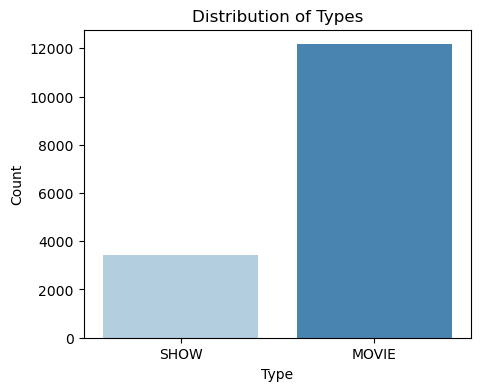

In [7]:
a, ax = plt.subplots(figsize=(5,4))
sns.countplot(x='type',data=movies, palette='Blues', ax = ax)
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### 2. Pie Diagram

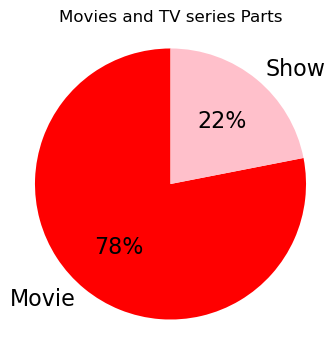

In [8]:
plt.figure(figsize=(5, 4))
plt.title('Movies and TV series Parts')
plt.pie(movies.type.value_counts(), 
        labels=['Movie', 'Show'],
        textprops={"fontsize":16},
        radius=1.1, startangle=90,
        colors=['red', 'pink'],
        autopct='%.0f%%')
plt.show()

### Visualising the Frequency plot and Pie Diagram the Proportion of movie is greater then show.

## Frequency distribution of Movies and Shows as per years

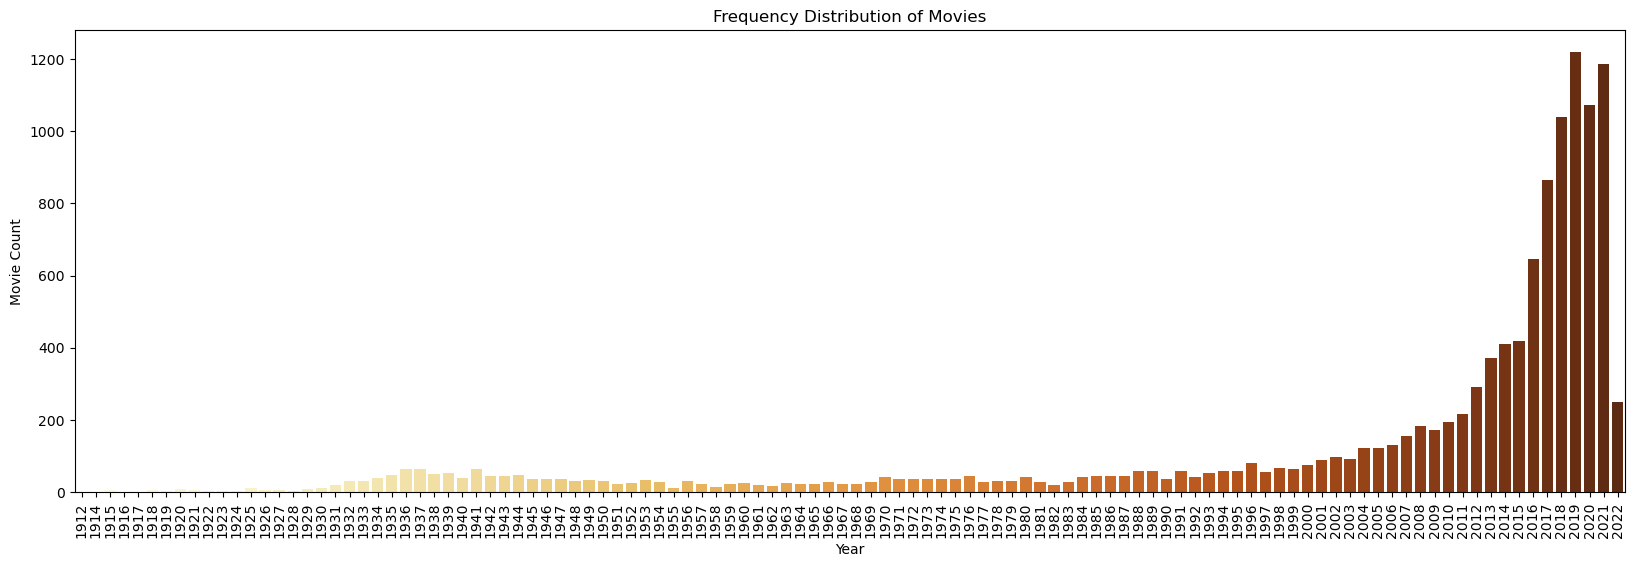

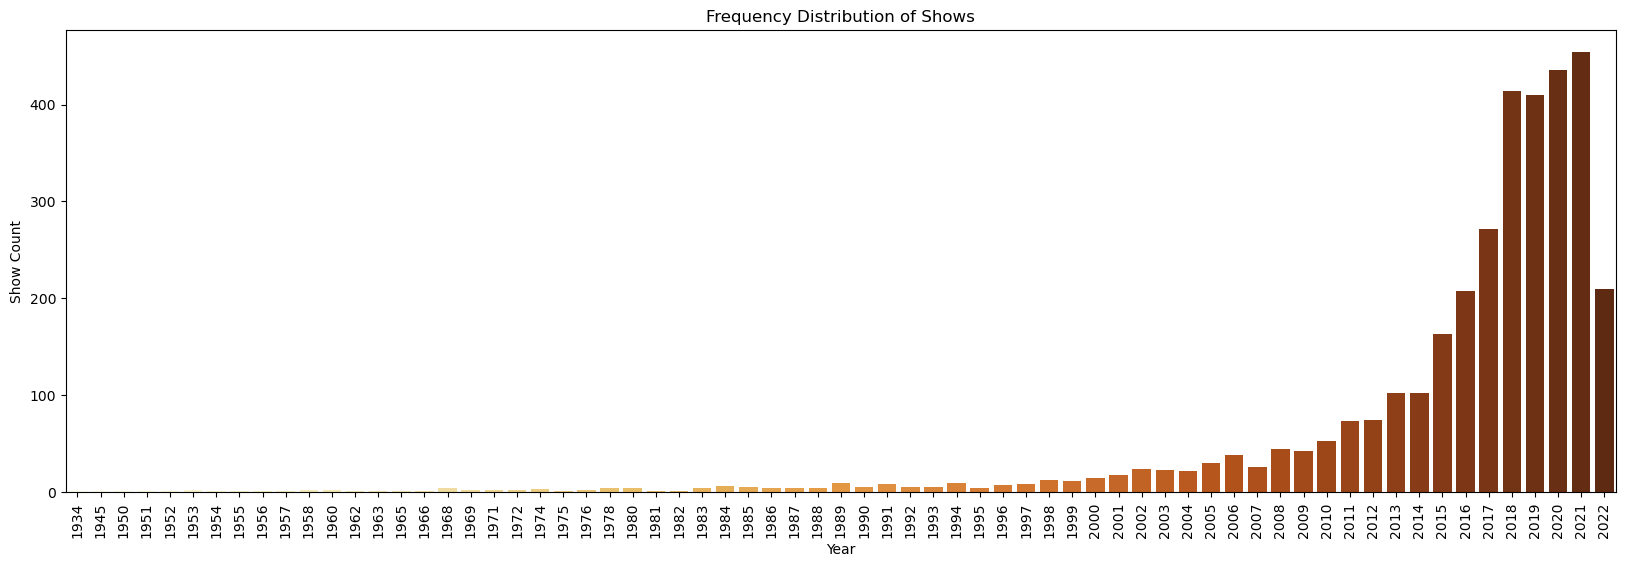

In [9]:
# for movies
plt.figure(figsize=(20,6))
sns.countplot(x=movies[movies['type']=='MOVIE']['release_year'], data = movies, palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Movies')
plt.xlabel("Year")
plt.ylabel("Movie Count")
plt.show()

# for shows
plt.figure(figsize=(20,6))
sns.countplot(x=movies[movies['type']=='SHOW']['release_year'], data = movies, palette='YlOrBr')
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Shows')
plt.xlabel("Year")
plt.ylabel("Show Count")
plt.show()

### The Comparision of Frequency plot depict, from 2010 to 2022, in large amount movies and shows are released on Netflix and Amazon prime platform, while, below 2010, frequency of movies and shows are very less.

### Collected the necessary columns

In [10]:
df = movies.drop(columns=['description', 'release_year', 'age_certification', 'runtime', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'])
df.head(5)

,id,title,type,genres
0,ts300399,Five Came Back: The Reference Films,SHOW,['documentation']
1,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']"
2,tm154986,Deliverance,MOVIE,"['drama', 'action', 'thriller', 'european']"
3,tm127384,Monty Python and the Holy Grail,MOVIE,"['fantasy', 'action', 'comedy']"
4,tm120801,The Dirty Dozen,MOVIE,"['war', 'action']"


In [11]:
df['main_genre'] = df['genres'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
df['main_genre'] = df['main_genre'].str.split(',').str[0]
df.head(4)

/var/folders/cx/25knvm0n4b9bzf_twfq_d55w0000gn/T/ipykernel_48156/2620861129.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,id,title,type,genres,main_genre
0,ts300399,Five Came Back: The Reference Films,SHOW,['documentation'],documentation
1,tm84618,Taxi Driver,MOVIE,"['drama', 'crime']",drama
2,tm154986,Deliverance,MOVIE,"['drama', 'action', 'thriller', 'european']",drama
3,tm127384,Monty Python and the Holy Grail,MOVIE,"['fantasy', 'action', 'comedy']",fantasy


In [12]:
df.main_genre.unique()

array(['documentation', 'drama', 'fantasy', 'war', 'comedy', 'thriller',
       'crime', 'romance', 'action', 'western', 'history', 'music',
       'horror', 'scifi', 'animation', 'family', 'reality', '', 'sport',
       'european'], dtype=object)

In [13]:
df['main_genre'] = df['main_genre'].replace('', np.nan)

In [14]:
df.main_genre.unique()

array(['documentation', 'drama', 'fantasy', 'war', 'comedy', 'thriller',
       'crime', 'romance', 'action', 'western', 'history', 'music',
       'horror', 'scifi', 'animation', 'family', 'reality', nan, 'sport',
       'european'], dtype=object)

In [15]:
df.shape

(15577, 5)

### Genres Data Type is converted from object to list

#### This method will help to convert the genres from object to list data type.

In [16]:
import ast
def ListConverter(obj):
    L = []

    for i in ast.literal_eval(obj):
            L.append(i)
    return L
df["genres"] = df["genres"].apply(ListConverter)
df.head(5)

,id,title,type,genres,main_genre
0,ts300399,Five Came Back: The Reference Films,SHOW,[documentation],documentation
1,tm84618,Taxi Driver,MOVIE,"[drama, crime]",drama
2,tm154986,Deliverance,MOVIE,"[drama, action, thriller, european]",drama
3,tm127384,Monty Python and the Holy Grail,MOVIE,"[fantasy, action, comedy]",fantasy
4,tm120801,The Dirty Dozen,MOVIE,"[war, action]",war


## Genres Frequency Distribution

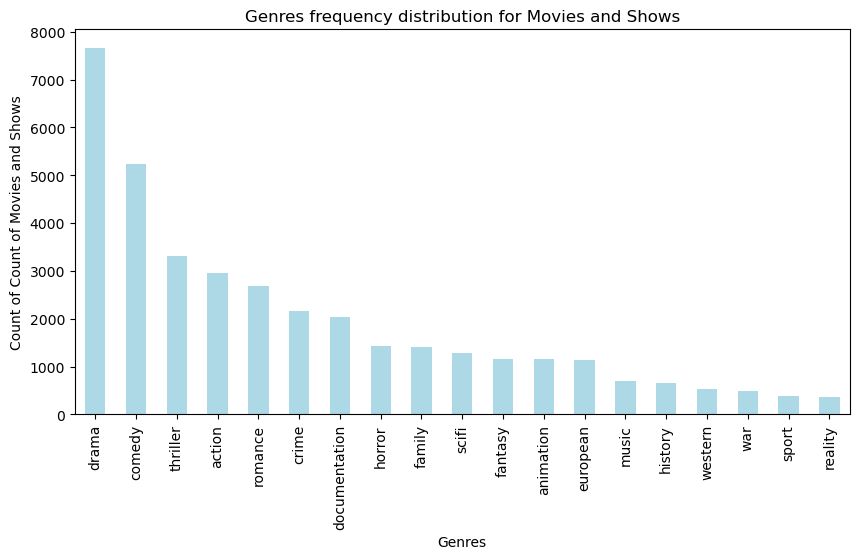

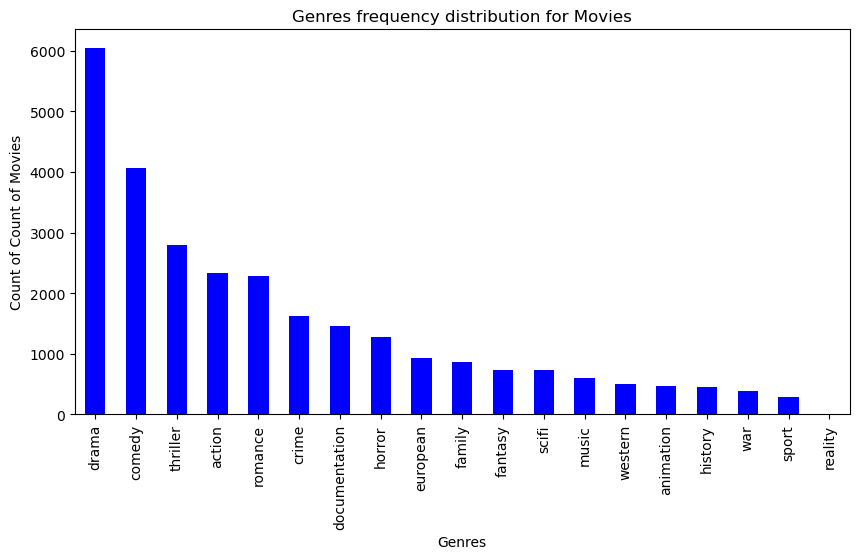

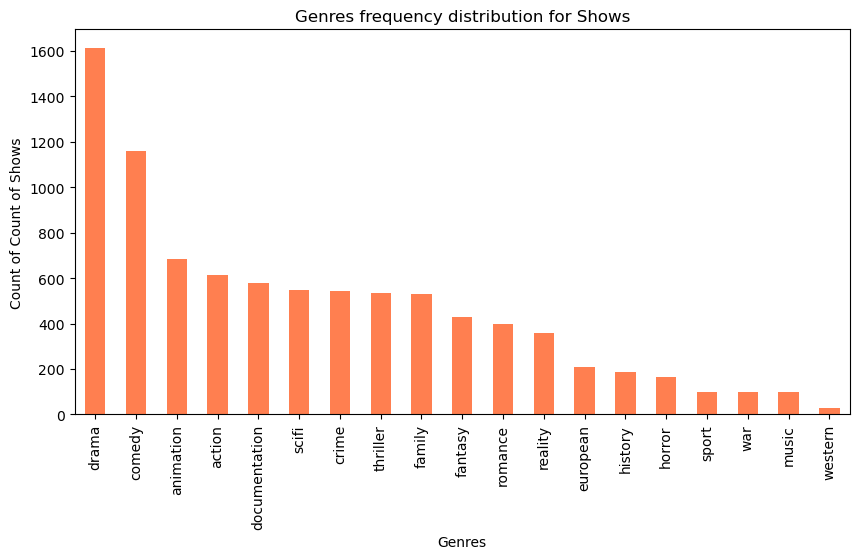

In [17]:
def frequency_plot(x, title, str, col):
    plt.figure(figsize=(10, 5))
    x.plot(kind='bar', color=col)
    plt.title(title)
    plt.xlabel('Genres')
    plt.ylabel(f'Count of {str}')
    plt.show()

# Overall genres frequeny distribution

Overall_genres_counts=df['genres'].explode().value_counts()
frequency_plot(Overall_genres_counts, 'Genres frequency distribution for Movies and Shows', 'Count of Movies and Shows', 'Lightblue')

# Movies genres frequeny distribution

Movies_genres_counts=df[df['type']=='MOVIE']['genres'].explode().value_counts()
frequency_plot(Movies_genres_counts, 'Genres frequency distribution for Movies', 'Count of Movies', 'Blue')

# Shows genres frequeny distribution

Shows_genres_counts=df[df['type']=='SHOW']['genres'].explode().value_counts()
frequency_plot(Shows_genres_counts, 'Genres frequency distribution for Shows', 'Count of Shows', "coral",)

### Genre drama has the highest frequency over other genres over all the 3 graphs, at second position comedy is there, on other hand war, music and western genres is much lower in the given dataset

# 1. First Approch:

### Workflow: 
1. Extract the genres feature and from movies data and created a pivot table(as 'movies_features').

2. One hot encoding is applied over the table to label 1 if a specific label is present for a movie or shows.-(its Movies Feature Matrix)

3. Next, a function 'user_genre_rating' help fo creating user and it data that takes ratings(on a scale of 0 to 5) for each genres from user . This ratings shows the user interest strength for the genres individually.-(its User Feature matrix). Additional for this approch more than one user are allowed.

4. Peform Cosine Similarity Computation between user and movies feature matrix. If there are two or more users for obtaining mutual interests we do manipulation over all users data that is multiplying their normalized genres rating which give the proper weightage for similarity computation.

5.  Lastly, Recommendation function provide top 10 recommendations to user/users. (note- 'recommended1' and ' recommendation' provide recommendation for single user, and, 'recommended2' and recommendation2 provide recommendation for multiple users.


In [18]:
movies_features = df.pivot(index='id', columns='main_genre', values='main_genre').fillna(0)
movies_features.head()

main_genre,NaN,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
id,,,,,,,,,,,,,,,,,,,,
tm100001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,western
tm1000022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,scifi,0,0,0,0
tm1000037,0,0,0,0,0,0,drama,0,0,0,0,0,0,0,0,0,0,0,0,0
tm1000147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,scifi,0,0,0,0
tm100015,0,action,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
movies_features = movies_features.drop(columns=np.nan)

In [20]:
movies_genres = df[['id','genres']]
movies_genres = movies_genres.set_index('id')
movies_features = movies_features.merge(movies_genres, left_on='id', right_index=True)
movies_features.head(5)

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western,genres
id,,,,,,,,,,,,,,,,,,,,
tm100001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,western,"[western, action, romance]"
tm1000022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,scifi,0,0,0,0,"[scifi, animation]"
tm1000037,0,0,0,0,0,drama,0,0,0,0,0,0,0,0,0,0,0,0,0,"[drama, thriller, european, romance]"
tm1000147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,scifi,0,0,0,0,"[scifi, thriller]"
tm100015,action,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[action, crime, drama, thriller]"


## Movies features matrix

In [21]:
def one_hot_encoding(i, j):
    feature = movies_features.genres[i][j]
    movies_features[feature][i] = 1

for i in range(len(movies_features)):
    for j in range(len(movies_features.genres[i])):
        one_hot_encoding(i, j)
movies_features = movies_features.drop(columns=['genres'])
movies_features.head(5)

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
id,,,,,,,,,,,,,,,,,,,
tm100001,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
tm1000022,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
tm1000037,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
tm1000147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
tm100015,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
movies_features.shape

(15577, 19)

## User profile creation and its Features extraction

In [23]:
genres = list(movies_features.columns)

# Prompt the user to rate their preference for each genre on a scale of 0 to 5

def user_genre_rating():
    genre_preferences = {}
    for genre in genres:
        rating = int(input(f"On a scale of 0 to 5, how much do you prefer {genre}?: "))
        if rating <=5 and rating>=-1:
            genre_preferences[genre] = rating
        else:
            break
    return genre_preferences

In [24]:
no_of_users = int(input('Enter no of users: '))
user_preferences={}
for i in range(no_of_users):
    print(f'\n user{i} rate their preference \n')
    user_preferences[i] = user_genre_rating()

Enter no of users: 2

 user0 rate their preference 

On a scale of 0 to 5, how much do you prefer action?: 5
On a scale of 0 to 5, how much do you prefer animation?: 3
On a scale of 0 to 5, how much do you prefer comedy?: 2
On a scale of 0 to 5, how much do you prefer crime?: 4
On a scale of 0 to 5, how much do you prefer documentation?: 0
On a scale of 0 to 5, how much do you prefer drama?: 5
On a scale of 0 to 5, how much do you prefer european?: 0
On a scale of 0 to 5, how much do you prefer family?: 0
On a scale of 0 to 5, how much do you prefer fantasy?: 0
On a scale of 0 to 5, how much do you prefer history?: 0
On a scale of 0 to 5, how much do you prefer horror?: 3
On a scale of 0 to 5, how much do you prefer music?: 0
On a scale of 0 to 5, how much do you prefer reality?: 0
On a scale of 0 to 5, how much do you prefer romance?: 0
On a scale of 0 to 5, how much do you prefer scifi?: 4
On a scale of 0 to 5, how much do you prefer sport?: 4
On a scale of 0 to 5, how much do you pr

In [25]:
users_features = pd.DataFrame.from_dict(user_preferences, orient='index').fillna(0)
users_features = users_features.rename_axis('user id')
users_features

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
user id,,,,,,,,,,,,,,,,,,,
0,5,3,2,4,0,5,0,0,0,0,3,0,0,0,4,4,3,0,0
1,5,5,4,4,3,5,1,1,0,0,4,0,3,3,4,2,3,1,0


# Similarity Computation

In [26]:
def normalize(user):
    sum = user.sum(axis=1)
    user_features = user.divide(sum, axis=0)
    return user_features
users_features = normalize(users_features)
users_features

,action,animation,comedy,crime,documentation,drama,european,family,fantasy,history,horror,music,reality,romance,scifi,sport,thriller,war,western
user id,,,,,,,,,,,,,,,,,,,
0,0.151515,0.090909,0.060606,0.121212,0.0000,0.151515,0.000000,0.000000,0.0,0.0,0.090909,0.0,0.0000,0.0000,0.121212,0.121212,0.090909,0.000000,0.0
1,0.104167,0.104167,0.083333,0.083333,0.0625,0.104167,0.020833,0.020833,0.0,0.0,0.083333,0.0,0.0625,0.0625,0.083333,0.041667,0.062500,0.020833,0.0


In [27]:
# mutual interest of users matrix.
if len(users_features)>1:
    mutual_interset = pd.DataFrame(users_features.iloc[:, :].prod(axis=0)).T
    mutual_interset = mutual_interset.rename_axis('mutual intersets')
else:
    mutual_interset = 0

In [28]:
recommended1 = pd.DataFrame(movies_features.dot(users_features.loc[0].T))
recommended1.columns = ['sim']

In [29]:
recommended1.head(10)

,sim
id,
tm100001,0.151515
tm1000022,0.212121
tm1000037,0.242424
tm1000147,0.212121
tm100015,0.515152
tm1000166,0.0
tm1000169,0.060606
tm1000185,0.060606
tm1000186,0.242424


In [30]:
recommended2 = pd.DataFrame(movies_features.dot(mutual_interset.loc[0].T))
recommended2.columns = ['sim']


In [31]:
recommended2.head(10)

,sim
id,
tm100001,0.015783
tm1000022,0.019571
tm1000037,0.021465
tm1000147,0.015783
tm100015,0.047348
tm1000166,0.0
tm1000169,0.005051
tm1000185,0.005051
tm1000186,0.021465


# Recommendation

### a) Recommendation for a single user

In [32]:
recommendation1 = recommended1.sort_values('sim', ascending=False).merge(movies, left_index=True, right_on='id')

### i) Top 10 Movies Recommendation

In [33]:
recommendation1.loc[recommendation1['type'] == 'MOVIE'].head(10).T

,3497,2331,4823,3491,420,1203,4652,4762,1345,3430
sim,0.757576,0.727273,0.727273,0.727273,0.69697,0.69697,0.666667,0.666667,0.666667,0.666667
id,tm524282,tm131829,tm1137051,tm850723,tm33981,tm245271,tm178686,tm852172,tm116924,tm29993
title,Invader ZIM: Enter the Florpus,Split Second,Bubble,Altered Carbon: Resleeved,Bon Cop Bad Cop,Gantz:O,Scavengers,Apollo 10½: A Space Age Childhood,"Yongary, Monster from the Deep",Vipers
type,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE
description,ZIM discovers his almighty leaders never had a...,"In a flooded future London, Detective Harley S...",In an abandoned Tokyo overrun by bubbles and g...,"On the planet Latimer, Takeshi Kovacs must pro...",When the body of the executive of hockey Benoi...,"Somewhere in Tokyo, there is a room. In that r...",A team of space scavengers discovers superior ...,A man narrates stories of his life as a 10-yea...,Earthquakes in central Korea turn out to be th...,A set of vipers has been taken by scientists t...
release_year,2019,1992,2022,2020,2006,2016,2013,2022,1967,2008
age_certification,NaN,R,PG,NaN,PG-13,NC-17,NaN,PG-13,PG,R
runtime,71,90,101,75,116,95,94,98,79,95
genres,"['drama', 'animation', 'action', 'family', 'fa...","['horror', 'scifi', 'drama', 'action', 'crime'...","['scifi', 'fantasy', 'romance', 'sport', 'thri...","['scifi', 'animation', 'crime', 'drama', 'thri...","['comedy', 'crime', 'action', 'scifi', 'drama'...","['scifi', 'action', 'animation', 'fantasy', 't...","['action', 'scifi', 'drama', 'thriller', 'come...","['animation', 'scifi', 'action', 'comedy', 'ro...","['horror', 'drama', 'fantasy', 'scifi', 'thril...","['scifi', 'horror', 'action', 'comedy', 'drama..."
production_countries,['US'],['GB'],['JP'],['JP'],['CA'],['JP'],['US'],"['NL', 'US']","['JP', 'KR']","['US', 'CA']"


### ii) Top 10 Shows Recommendation

In [34]:
recommendation1.loc[recommendation1['type'] == 'SHOW'].head(10).T

,324,644,1972,3047,2872,658,2097,3216,1917,370
sim,0.878788,0.878788,0.818182,0.757576,0.757576,0.757576,0.727273,0.727273,0.727273,0.69697
id,ts21740,ts21095,ts79157,ts88361,ts15638,ts20433,ts75620,ts103329,ts79660,ts25765
title,Black Butler,Teenage Mutant Ninja Turtles,B: The Beginning,"Love, Death & Robots",Elfen Lied,JoJo's Bizarre Adventure,Black,Ghost in the Shell: SAC_2045,Creeped Out,Vampire Knight
type,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW
description,"In Victorian-era London, on the night of Ciel ...",The Teenage Mutant Ninja Turtles are back in a...,"In a world powered by advanced technology, cri...","Terrifying creatures, wicked surprises and dar...","The Diclonius, a mutated homo sapien that is s...",Follow the intergenerational feud between the ...,"A Grim Reaper, a detective and a woman who for...","After a global financial crisis, the world is ...","A masked figure known as ""The Curious"" collect...","Yuki Cross, along with her best friend Zero, a..."
release_year,2008,2012,2018,2019,2004,2012,2017,2020,2017,2008
age_certification,TV-MA,TV-Y7,TV-MA,TV-MA,TV-MA,TV-MA,TV-MA,TV-14,TV-PG,TV-14
runtime,25,24,25,13,26,24,78,25,26,25
genres,"['scifi', 'animation', 'drama', 'thriller', 'c...","['animation', 'scifi', 'action', 'family', 'th...","['scifi', 'horror', 'crime', 'thriller', 'acti...","['scifi', 'animation', 'thriller', 'horror', '...","['animation', 'horror', 'scifi', 'action', 'th...","['scifi', 'animation', 'action', 'comedy', 'dr...","['scifi', 'drama', 'action', 'thriller', 'horr...","['scifi', 'action', 'animation', 'crime', 'dra...","['scifi', 'thriller', 'family', 'fantasy', 'ac...","['animation', 'drama', 'action', 'scifi', 'thr..."
production_countries,['JP'],['US'],['JP'],['US'],['JP'],['JP'],['KR'],['JP'],"['CA', 'GB']",['JP']


### iii) Top 10 Movies and Shows Recommendation

In [35]:
recommendation1.head(10).T

,324,644,1972,3047,2872,3497,658,2097,3216,2331
sim,0.878788,0.878788,0.818182,0.757576,0.757576,0.757576,0.757576,0.727273,0.727273,0.727273
id,ts21740,ts21095,ts79157,ts88361,ts15638,tm524282,ts20433,ts75620,ts103329,tm131829
title,Black Butler,Teenage Mutant Ninja Turtles,B: The Beginning,"Love, Death & Robots",Elfen Lied,Invader ZIM: Enter the Florpus,JoJo's Bizarre Adventure,Black,Ghost in the Shell: SAC_2045,Split Second
type,SHOW,SHOW,SHOW,SHOW,SHOW,MOVIE,SHOW,SHOW,SHOW,MOVIE
description,"In Victorian-era London, on the night of Ciel ...",The Teenage Mutant Ninja Turtles are back in a...,"In a world powered by advanced technology, cri...","Terrifying creatures, wicked surprises and dar...","The Diclonius, a mutated homo sapien that is s...",ZIM discovers his almighty leaders never had a...,Follow the intergenerational feud between the ...,"A Grim Reaper, a detective and a woman who for...","After a global financial crisis, the world is ...","In a flooded future London, Detective Harley S..."
release_year,2008,2012,2018,2019,2004,2019,2012,2017,2020,1992
age_certification,TV-MA,TV-Y7,TV-MA,TV-MA,TV-MA,NaN,TV-MA,TV-MA,TV-14,R
runtime,25,24,25,13,26,71,24,78,25,90
genres,"['scifi', 'animation', 'drama', 'thriller', 'c...","['animation', 'scifi', 'action', 'family', 'th...","['scifi', 'horror', 'crime', 'thriller', 'acti...","['scifi', 'animation', 'thriller', 'horror', '...","['animation', 'horror', 'scifi', 'action', 'th...","['drama', 'animation', 'action', 'family', 'fa...","['scifi', 'animation', 'action', 'comedy', 'dr...","['scifi', 'drama', 'action', 'thriller', 'horr...","['scifi', 'action', 'animation', 'crime', 'dra...","['horror', 'scifi', 'drama', 'action', 'crime'..."
production_countries,['JP'],['US'],['JP'],['US'],['JP'],['US'],['JP'],['KR'],['JP'],['GB']


### b) Recomendation for multiple users

In [36]:
recommendation2 = recommended2.sort_values('sim', ascending=False).merge(movies, left_index=True, right_on='id')

### i) Top 10 Movies Recommendation

In [37]:
recommendation2.loc[recommendation2['type'] == 'MOVIE'].head(10).T

,3497,3491,2331,1203,4762,420,679,388,4823,4652
sim,0.069444,0.066919,0.065025,0.064394,0.063763,0.0625,0.061869,0.061869,0.061869,0.059975
id,tm524282,tm850723,tm131829,tm245271,tm852172,tm33981,tm38980,tm164557,tm1137051,tm178686
title,Invader ZIM: Enter the Florpus,Altered Carbon: Resleeved,Split Second,Gantz:O,Apollo 10½: A Space Age Childhood,Bon Cop Bad Cop,Rise of the Guardians,Initial D,Bubble,Scavengers
type,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE
description,ZIM discovers his almighty leaders never had a...,"On the planet Latimer, Takeshi Kovacs must pro...","In a flooded future London, Detective Harley S...","Somewhere in Tokyo, there is a room. In that r...",A man narrates stories of his life as a 10-yea...,When the body of the executive of hockey Benoi...,When an evil spirit known as Pitch lays down t...,"After winning his first competition, Takumi fo...",In an abandoned Tokyo overrun by bubbles and g...,A team of space scavengers discovers superior ...
release_year,2019,2020,1992,2016,2022,2006,2012,2005,2022,2013
age_certification,NaN,NaN,R,NC-17,PG-13,PG-13,PG,NaN,PG,NaN
runtime,71,75,90,95,98,116,97,107,101,94
genres,"['drama', 'animation', 'action', 'family', 'fa...","['scifi', 'animation', 'crime', 'drama', 'thri...","['horror', 'scifi', 'drama', 'action', 'crime'...","['scifi', 'action', 'animation', 'fantasy', 't...","['animation', 'scifi', 'action', 'comedy', 'ro...","['comedy', 'crime', 'action', 'scifi', 'drama'...","['fantasy', 'action', 'family', 'animation', '...","['crime', 'thriller', 'drama', 'action', 'anim...","['scifi', 'fantasy', 'romance', 'sport', 'thri...","['action', 'scifi', 'drama', 'thriller', 'come..."
production_countries,['US'],['JP'],['GB'],['JP'],"['NL', 'US']",['CA'],['US'],"['JP', 'HK']",['JP'],['US']


### ii) Top 10 Shows Recommendation

In [38]:
recommendation2.loc[recommendation2['type'] == 'SHOW'].head(10).T

,324,644,1972,658,2872,3047,3216,2097,1917,8953
sim,0.079545,0.079545,0.074495,0.069444,0.069444,0.069444,0.066919,0.065025,0.065025,0.064394
id,ts21740,ts21095,ts79157,ts20433,ts15638,ts88361,ts103329,ts75620,ts79660,ts281929
title,Black Butler,Teenage Mutant Ninja Turtles,B: The Beginning,JoJo's Bizarre Adventure,Elfen Lied,"Love, Death & Robots",Ghost in the Shell: SAC_2045,Black,Creeped Out,Invincible
type,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW
description,"In Victorian-era London, on the night of Ciel ...",The Teenage Mutant Ninja Turtles are back in a...,"In a world powered by advanced technology, cri...",Follow the intergenerational feud between the ...,"The Diclonius, a mutated homo sapien that is s...","Terrifying creatures, wicked surprises and dar...","After a global financial crisis, the world is ...","A Grim Reaper, a detective and a woman who for...","A masked figure known as ""The Curious"" collect...",Mark Grayson is a normal teenager except for t...
release_year,2008,2012,2018,2012,2004,2019,2020,2017,2017,2021
age_certification,TV-MA,TV-Y7,TV-MA,TV-MA,TV-MA,TV-MA,TV-14,TV-MA,TV-PG,TV-MA
runtime,25,24,25,24,26,13,25,78,26,45
genres,"['scifi', 'animation', 'drama', 'thriller', 'c...","['animation', 'scifi', 'action', 'family', 'th...","['scifi', 'horror', 'crime', 'thriller', 'acti...","['scifi', 'animation', 'action', 'comedy', 'dr...","['animation', 'horror', 'scifi', 'action', 'th...","['scifi', 'animation', 'thriller', 'horror', '...","['scifi', 'action', 'animation', 'crime', 'dra...","['scifi', 'drama', 'action', 'thriller', 'horr...","['scifi', 'thriller', 'family', 'fantasy', 'ac...","['scifi', 'drama', 'fantasy', 'thriller', 'hor..."
production_countries,['JP'],['US'],['JP'],['JP'],['JP'],['US'],['JP'],['KR'],"['CA', 'GB']",['US']


### iii) Top 10 Movies and Shows Recommendation

In [39]:
recommendation2.head(10).T

,324,644,1972,658,2872,3047,3497,3491,3216,2097
sim,0.079545,0.079545,0.074495,0.069444,0.069444,0.069444,0.069444,0.066919,0.066919,0.065025
id,ts21740,ts21095,ts79157,ts20433,ts15638,ts88361,tm524282,tm850723,ts103329,ts75620
title,Black Butler,Teenage Mutant Ninja Turtles,B: The Beginning,JoJo's Bizarre Adventure,Elfen Lied,"Love, Death & Robots",Invader ZIM: Enter the Florpus,Altered Carbon: Resleeved,Ghost in the Shell: SAC_2045,Black
type,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,MOVIE,MOVIE,SHOW,SHOW
description,"In Victorian-era London, on the night of Ciel ...",The Teenage Mutant Ninja Turtles are back in a...,"In a world powered by advanced technology, cri...",Follow the intergenerational feud between the ...,"The Diclonius, a mutated homo sapien that is s...","Terrifying creatures, wicked surprises and dar...",ZIM discovers his almighty leaders never had a...,"On the planet Latimer, Takeshi Kovacs must pro...","After a global financial crisis, the world is ...","A Grim Reaper, a detective and a woman who for..."
release_year,2008,2012,2018,2012,2004,2019,2019,2020,2020,2017
age_certification,TV-MA,TV-Y7,TV-MA,TV-MA,TV-MA,TV-MA,NaN,NaN,TV-14,TV-MA
runtime,25,24,25,24,26,13,71,75,25,78
genres,"['scifi', 'animation', 'drama', 'thriller', 'c...","['animation', 'scifi', 'action', 'family', 'th...","['scifi', 'horror', 'crime', 'thriller', 'acti...","['scifi', 'animation', 'action', 'comedy', 'dr...","['animation', 'horror', 'scifi', 'action', 'th...","['scifi', 'animation', 'thriller', 'horror', '...","['drama', 'animation', 'action', 'family', 'fa...","['scifi', 'animation', 'crime', 'drama', 'thri...","['scifi', 'action', 'animation', 'crime', 'dra...","['scifi', 'drama', 'action', 'thriller', 'horr..."
production_countries,['JP'],['US'],['JP'],['JP'],['JP'],['US'],['US'],['JP'],['JP'],['KR']


# Conclusion:
Recommendation system provide 3 results.
1. Movie recomendation
2. Shows recommendation
3. Both Movie and Show recommendation

This Approch provide results or recommendation very efficiently, this can be obsereved by comapring user preferred genres and output obtain for the user. As well, similarity scores also define for the quality of recommendations.
Overall, the structure and logic of systemized work flow provide qualitative recommendations to users.

# Second Approch
This Approch uses Text Vectorization Method-Bag of Words, for providing recomendatinos based of genres text features.
### Workflow: 
1. Extract the genres feature and from movies data by using python string functionality. Moreover, we convert genres into string format


2. Next,'input_user_data' funciton help fo creating user and it collect genres textually as input.

3. Vectorization method (Countvectorizer()), transform text in numerical vector arrays for both user and movies data. After, Cosine similarity is applied for estimating similarity scores between user and movies.(This approch work only for single user.)

4.  Lastly, Recommendation function provide top 10 recommendations to user.


# Features Engineer

In [40]:
df.head(3)

,id,title,type,genres,main_genre
0,ts300399,Five Came Back: The Reference Films,SHOW,[documentation],documentation
1,tm84618,Taxi Driver,MOVIE,"[drama, crime]",drama
2,tm154986,Deliverance,MOVIE,"[drama, action, thriller, european]",drama


In [41]:
df['genres'] = df['genres'].apply(lambda x:' '.join(x))
df["genres"] =  df["genres"].apply(lambda x:x.lower())
df = df.drop(columns=['main_genre'])

df.head(5)

,id,title,type,genres
0,ts300399,Five Came Back: The Reference Films,SHOW,documentation
1,tm84618,Taxi Driver,MOVIE,drama crime
2,tm154986,Deliverance,MOVIE,drama action thriller european
3,tm127384,Monty Python and the Holy Grail,MOVIE,fantasy action comedy
4,tm120801,The Dirty Dozen,MOVIE,war action


## User profile creation and its Features extraction

In [148]:
def input_user_data():
    usersdata= []
    userdata = {
            'user_id': '',
            'genres': []
    }

    userdata['user_id'] = input('Enter user id: ')
    genres = input(f"Enter preferred genres for user (separated by commas): ")
    userdata['genres'] = [genre.strip() for genre in genres.split(', ')]
    usersdata.append(userdata)

    return pd.DataFrame(usersdata)


# Example usage: Input data for 3 users
user_data = input_user_data()

Enter user id: 1
Enter preferred genres for user (separated by commas): reality, documentation, thriller, crime, fantasy


In [149]:
user_data['genres'] = user_data['genres'].apply(lambda x:', '.join(x))
user_data['genres'] = user_data['genres'].apply(lambda x:x.lower())
user_data

,user_id,genres
0,1,"reality, documentation, thriller, crime, fantasy"


## Vectorization and Similarity Computation

In [150]:
def compute_cosine_similarity(ud, md):
    vectorizer = CountVectorizer(max_features=5000, stop_words='english')
    users_vectors = vectorizer.fit_transform(ud['genres']).toarray()
    movies_vectors = vectorizer.transform(md['genres']).toarray()
    similarity = cosine_similarity(users_vectors, movies_vectors)
    return similarity

In [151]:
def recommender(ud, md):
    cos_sim = compute_cosine_similarity(ud, md)
    recommend = pd.DataFrame(cos_sim).T
    recommend.columns = ['sim']
    recommend = recommend.merge(movies, left_index=True, right_index=True).sort_values('sim', ascending=False)
    return recommend

# Recommendation

In [152]:
recommendation = recommender(user_data, df)

### i) Top 10 Movies Recommendation

In [153]:
recommendation.loc[recommendation['type'] == 'MOVIE'].head(10).T

,9818,3043,9096,4929,2328,1442,5211,2328,2438,5036
sim,0.894427,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597
id,tm1023211,tm138565,tm1032340,tm138855,tm376234,tm119847,tm173608,tm20702,tm428073,tm148598
title,Kartha,Dickie Roberts: Former Child Star,American Traitor: The Trial of Axis Sally,The Midnight After,The Warning,Mars Needs Women,Arya Surya,Drowning Mona,When Angels Sleep,Hard to Get
type,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE,MOVIE
description,Kartha is a Sandalwood action and drama movie ...,"TV child star of the '70s, Dickie Roberts is n...",The life of American woman Mildred Gillars and...,A night like any other in the streets of Hong ...,"After his friend is shot, Jon finds a numerica...",Tommy Kirk leads his fellow Martians to Earth ...,Aaryananda (Srinivasan) and Suryananda (Vishnu...,The recently deceased Mona Dearly was many thi...,"Germán, an honest family man, sees how his who...",TK is a handsome and charming womanizer who ru...
release_year,2021,2003,2021,2014,2018,1968,2013,2000,2018,2014
age_certification,NaN,PG-13,R,NaN,NaN,NaN,NaN,PG-13,NaN,NaN
runtime,155,98,107,121,93,83,123,96,94,95
genres,['drama'],['comedy'],['drama'],"['thriller', 'comedy', 'scifi']","['thriller', 'fantasy', 'crime', 'drama', 'act...",['scifi'],[],"['crime', 'comedy']","['thriller', 'drama', 'horror', 'action', 'cri...","['drama', 'action', 'romance']"
production_countries,[],['US'],['US'],['HK'],['ES'],['US'],['IN'],['US'],['ES'],['ZA']


### ii) Top 10 Shows Recommendation

In [154]:
recommendation.loc[recommendation['type'] == 'SHOW'].head(10).T

,5130,5211,4929,1442,2265,5036,2265,3205,3205,3043
sim,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597
id,ts288195,ts320426,ts271413,ts87465,ts13984,ts104499,ts84799,ts57359,ts281928,ts216746
title,Invisible City,Crime Scene: The Times Square Killer,Night Stalker: The Hunt for a Serial Killer,Witch Hunt: A Century of Murder,Dora the Explorer,Trese,Victim Number 8,Inspector De Luca,Unsolved Mysteries,The Secret of Skinwalker Ranch
type,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW,SHOW
description,An environmental police officer uncovers a hid...,"In 1970s NYC, the “Torso Killer” preys on wome...",Beneath the sunlit glamour of 1985 L.A. lurks ...,"Four hundred years ago, hundreds of innocent p...",A young girl named Dora goes on adventures wit...,Set in Manila where the mythical creatures of ...,An jihadist attack in the old town of Bilbao e...,"Between 1938 and 1948, from the height of Ital...","Real cases of perplexing disappearances, shock...",A team of experts and scientists undertakes ex...
release_year,2021,2021,2021,2015,2000,2021,2018,2008,2020,2020
age_certification,TV-MA,TV-MA,TV-MA,TV-14,TV-Y,TV-MA,NaN,NaN,TV-MA,TV-PG
runtime,37,49,47,46,26,29,54,107,49,42
genres,"['thriller', 'drama', 'crime', 'fantasy']","['thriller', 'documentation', 'crime', 'history']","['documentation', 'crime', 'thriller']","['documentation', 'crime', 'history', 'drama',...","['action', 'family', 'animation', 'fantasy', '...","['horror', 'scifi', 'thriller', 'action', 'cri...","['crime', 'drama', 'action', 'thriller', 'fant...","['drama', 'war', 'european']","['documentation', 'drama', 'thriller', 'crime']","['horror', 'reality', 'thriller', 'documentati..."
production_countries,['BR'],['US'],['US'],['GB'],['US'],['PH'],['ES'],['IT'],['US'],['US']


### iii) Top 10 Movies and Shows Recommendation

In [155]:
recommendation.head(10).T

,9818,5130,5211,3043,9096,4929,4929,2328,1442,1442
sim,0.894427,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597,0.774597
id,tm1023211,ts288195,ts320426,tm138565,tm1032340,tm138855,ts271413,tm376234,tm119847,ts87465
title,Kartha,Invisible City,Crime Scene: The Times Square Killer,Dickie Roberts: Former Child Star,American Traitor: The Trial of Axis Sally,The Midnight After,Night Stalker: The Hunt for a Serial Killer,The Warning,Mars Needs Women,Witch Hunt: A Century of Murder
type,MOVIE,SHOW,SHOW,MOVIE,MOVIE,MOVIE,SHOW,MOVIE,MOVIE,SHOW
description,Kartha is a Sandalwood action and drama movie ...,An environmental police officer uncovers a hid...,"In 1970s NYC, the “Torso Killer” preys on wome...","TV child star of the '70s, Dickie Roberts is n...",The life of American woman Mildred Gillars and...,A night like any other in the streets of Hong ...,Beneath the sunlit glamour of 1985 L.A. lurks ...,"After his friend is shot, Jon finds a numerica...",Tommy Kirk leads his fellow Martians to Earth ...,"Four hundred years ago, hundreds of innocent p..."
release_year,2021,2021,2021,2003,2021,2014,2021,2018,1968,2015
age_certification,NaN,TV-MA,TV-MA,PG-13,R,NaN,TV-MA,NaN,NaN,TV-14
runtime,155,37,49,98,107,121,47,93,83,46
genres,['drama'],"['thriller', 'drama', 'crime', 'fantasy']","['thriller', 'documentation', 'crime', 'history']",['comedy'],['drama'],"['thriller', 'comedy', 'scifi']","['documentation', 'crime', 'thriller']","['thriller', 'fantasy', 'crime', 'drama', 'act...",['scifi'],"['documentation', 'crime', 'history', 'drama',..."
production_countries,[],['BR'],['US'],['US'],['US'],['HK'],['US'],['ES'],['US'],['GB']


# Conclusion:
Recommendation system provide 3 results.
1. Movie recomendation
2. Shows recommendation
3. Both Movie and Show recommendation

This Approch provide better results or recommendation, One drawback of this approch of Bag-of-Words method, it provide vectorization on the base of word counts, that's why compution genrates high similarity scores which is on an average accurate. Comparing first approch provides much better results. Although, for workign on text based approch an DeepLearning models are much more efficient for recommendations. Overall, the work of conduct provide good an average qualitativ results. 